> Dataset

The data we process is a dataset with 1000 rows and 18 columns covering the exploratory information of bank customers(churn).The categorical variables(i.e.Geography/Gender/Cardtype)could be helpful to draw our customer image and the continuous variables(i.e.CreditScore/Age/Balance/Salary/Point) are relevant to the customer exit rate.


> Target


Based on the data acquired, I will summerise the typical profile of churn customers, explore correlation between numerical variables and customer exit cases.

1.Customer Image

2.Correlation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv("/content/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
#none empty values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [3]:
df = df.drop(["CustomerId","Surname"], axis=1)
df

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [4]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000




> Customer Analysis



1.1 Customer Overview

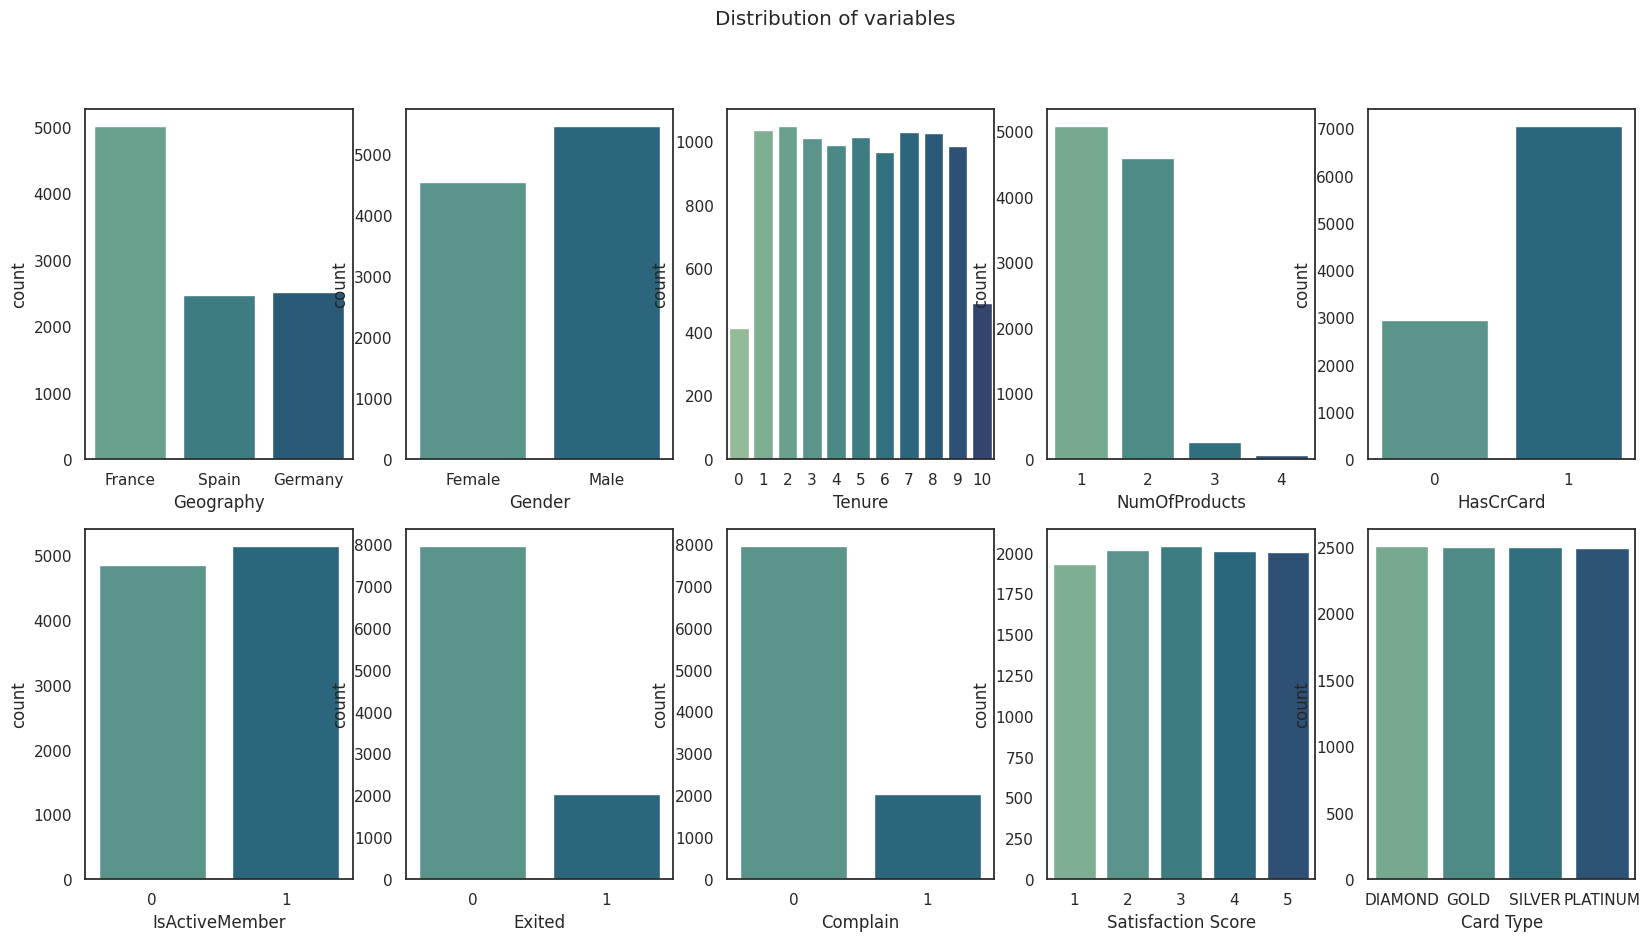

In [40]:
# List all categorical variebles;
Catvariables = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited','Complain','Satisfaction Score','Card Type']

fig, ax = plt.subplots(2,5, figsize=(20,10))

for v, var in enumerate(Catvariables):
    row = v // 5
    col = v % 5
    sns.countplot(data=df, x=var, ax=ax[row][col], palette="crest")

fig.suptitle('Distribution of variables')
plt.show()

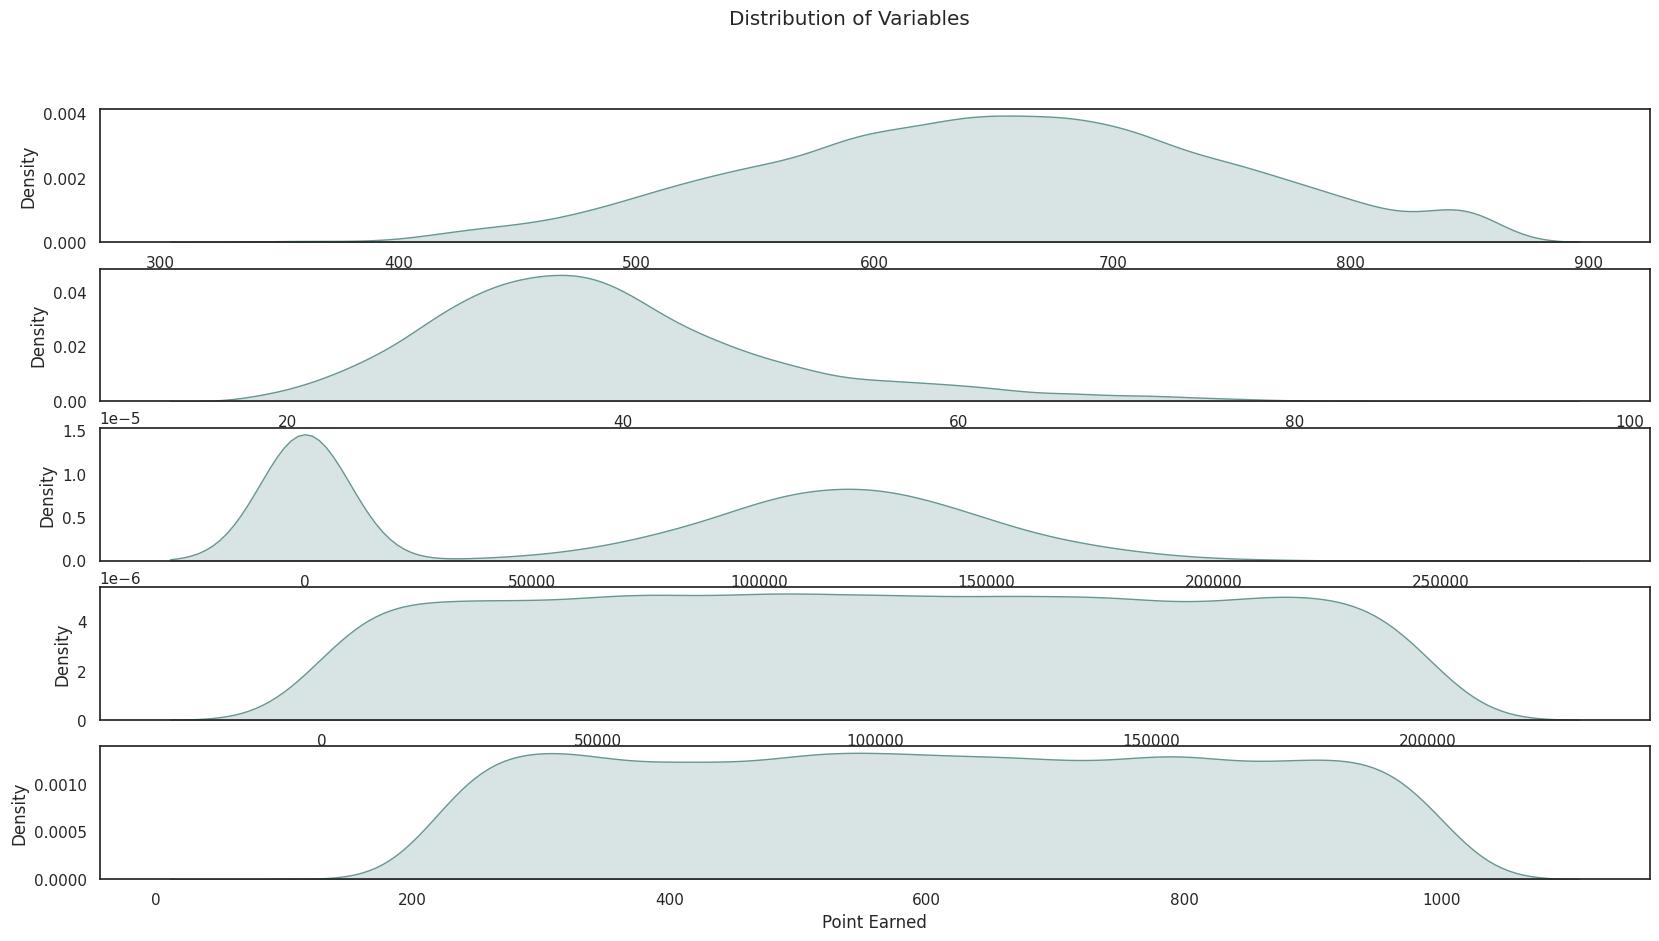

In [51]:
# List all continuous variables;
Nurvariables = ['CreditScore','Age','Balance','EstimatedSalary','Point Earned']
fig,ax = plt.subplots(5,1, figsize=(20,10))
for n,var in enumerate(Nurvariables):
  col=n
  sns.kdeplot(data=df, x=var,ax=ax[col],fill=True, color='#669792')
fig.suptitle('Distribution of Variables')
plt.show()

1.2 Exit

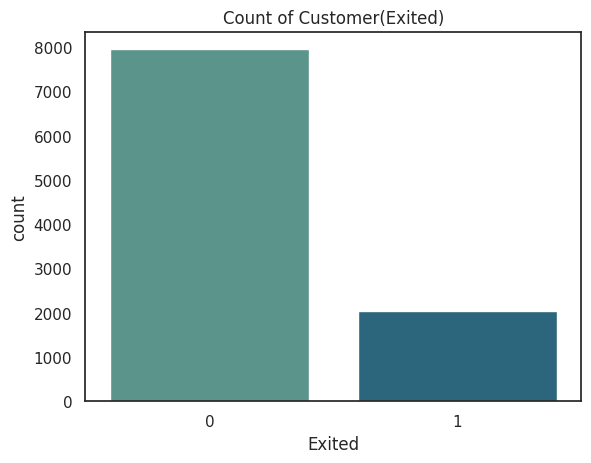

In [41]:
# Specifically look at customer exit cases;
sns.countplot(data=df, x='Exited',palette="crest")
plt.title('Count of Customer(Exited)')
plt.show()

<Axes: title={'center': 'Distribution of Age'}, xlabel='Age', ylabel='count'>

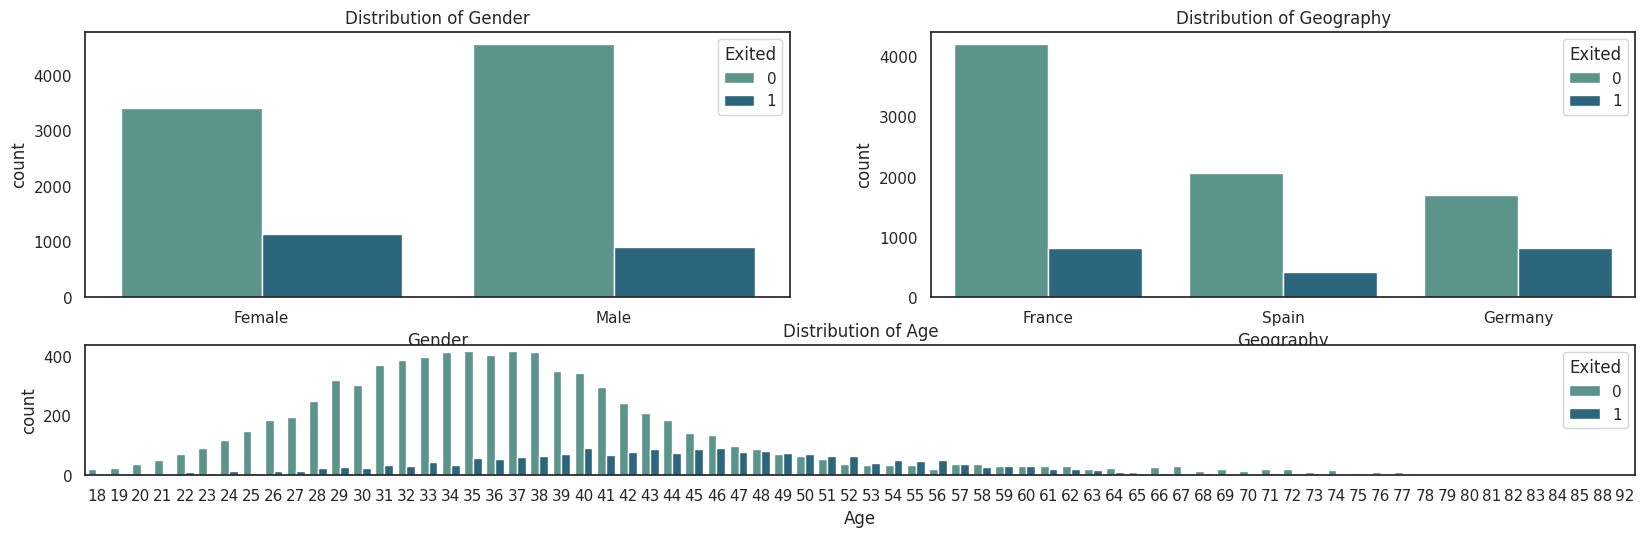

In [42]:
# Compare exited cases based on three variables(country,gender and age);
plt.figure(figsize=(20,20))

plt.subplot(5,2,1)
plt.title('Distribution of Gender')
sns.countplot(data=df, x='Gender',palette="crest",hue='Exited')

plt.subplot(5,2,2)
plt.title('Distribution of Geography')
sns.countplot(data=df, x='Geography',palette="crest",hue='Exited')

plt.subplot(10,1,3)
plt.title('Distribution of Age')
sns.countplot(data=df, x='Age',palette="crest",hue='Exited')

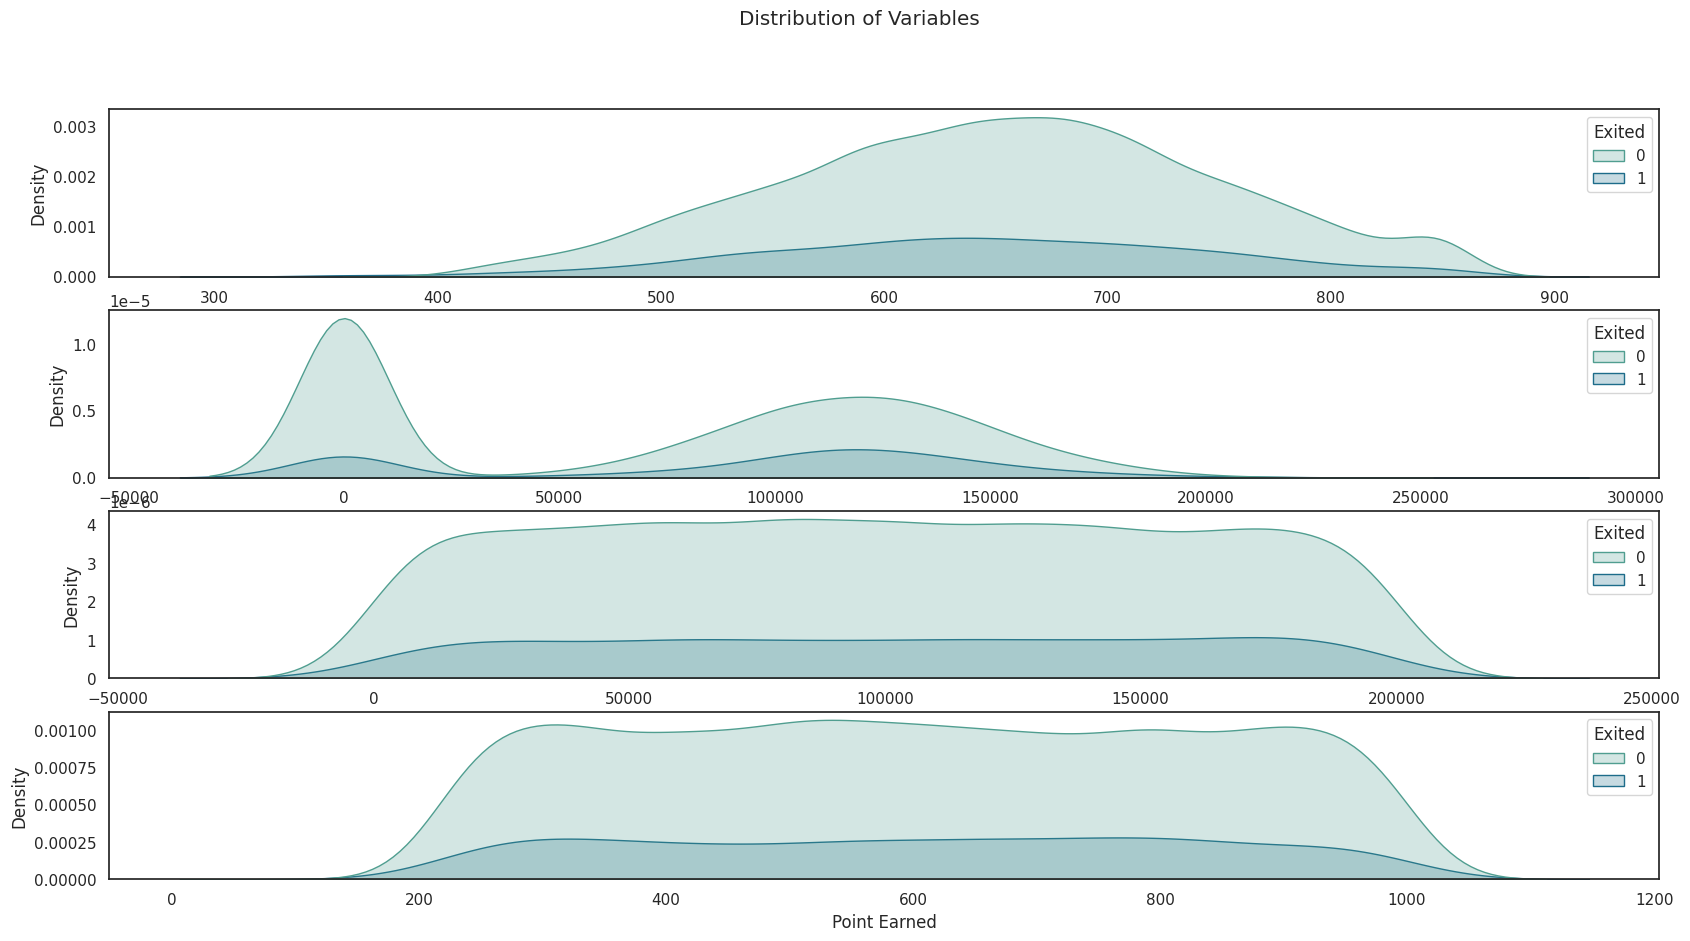

In [43]:
# Compare exited cases based on continuous variables(CreditScore,Balance,EstimatedSalary,Point Earned);
Nurvariables = ['CreditScore','Balance','EstimatedSalary','Point Earned']
fig,ax = plt.subplots(4,1, figsize=(20,10))
for n,var in enumerate(Nurvariables):
  col=n
  sns.kdeplot(data=df, x=var,ax=ax[col],hue='Exited', fill=True, palette="crest")
fig.suptitle('Distribution of Variables')
plt.show()



> Interesting Observations:

1. Females have a higher exit rate compared to males.Customers in Germany have higher exit rate than in Spain and France;
2. As the age group around 35 occupies the largest proportion among bank customers, it is not the group with the highest exit rate. The exit rate slightly increases around the age of 45.
3. The highest exit rate in terms of bank balance is not observed in the zero balance group, but in the Middle group(around 125000).


> Correlation



<ipython-input-63-fbe167aee192>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

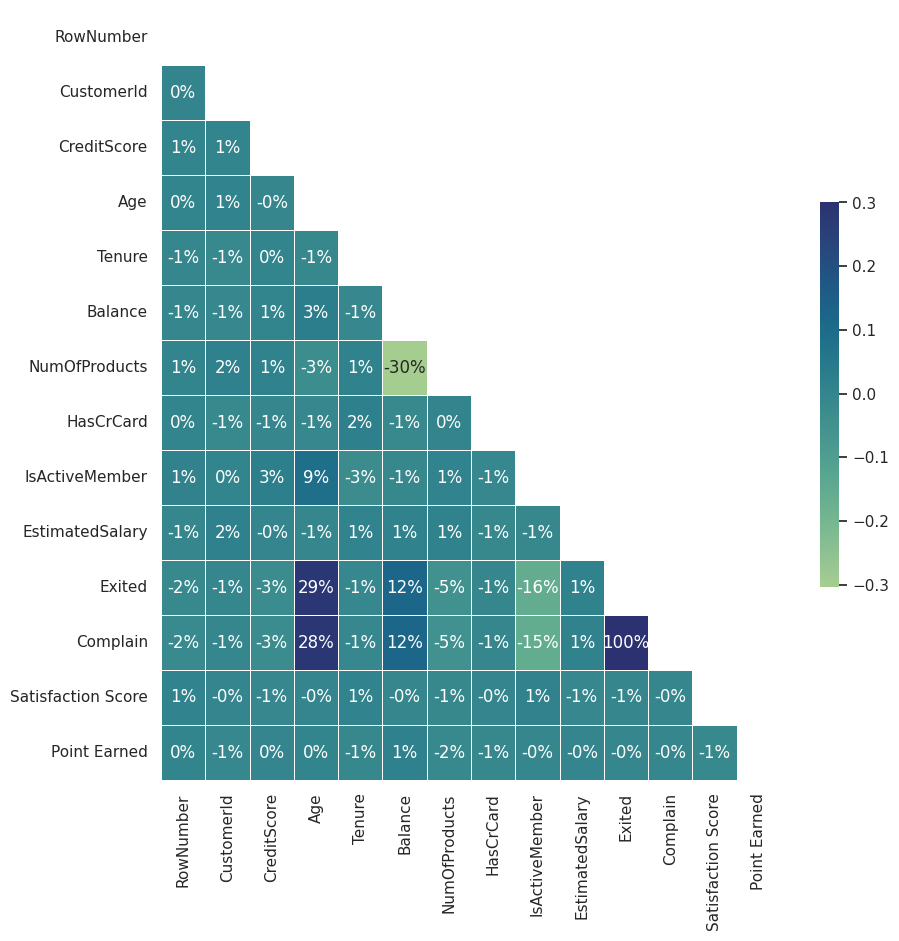

In [63]:
# Explore correlation between variables;
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(10,10))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap='crest', fmt='.0%', vmax=.3, center=0,
            annot=True,linewidths=.5, cbar_kws={"shrink": .5})


Stronger Correlation regarding Exit is observed with three variables: Age, Balance and IsActiveMember;

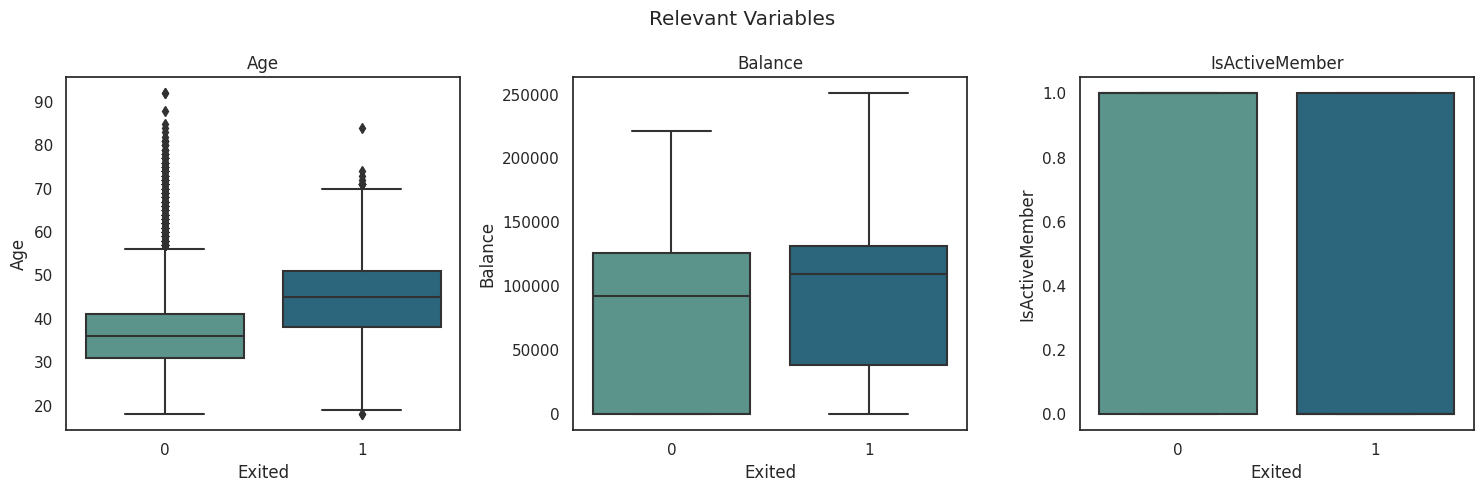

In [68]:
# Closer look at Age, Balance and IsActiveMember;

plt.figure(figsize=(15, 5))
plt.suptitle('Relevant Variables')

plt.subplot(1, 3, 1)
sns.boxplot(data=df, y="Age", x="Exited", palette='crest')
plt.title('Age')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y="Balance", x="Exited", palette='crest')
plt.title('Balance')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y="IsActiveMember", x="Exited", palette='crest')
plt.title('IsActiveMember')


plt.tight_layout()
plt.show()

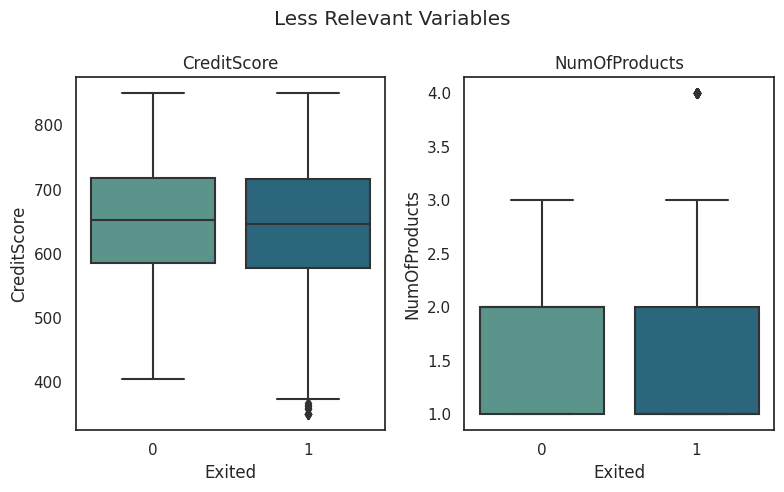

In [72]:
# Less relevant variables: CreditScore, NumOfProducts;

plt.figure(figsize=(8, 5))
plt.suptitle('Less Relevant Variables')

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y="CreditScore", x="Exited", palette='crest')
plt.title('CreditScore')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="NumOfProducts", x="Exited", palette='crest')
plt.title('NumOfProducts')

plt.tight_layout()
plt.show()



> Conclusion

1. Typical Bank Customer Profile:
French male, active member between 31 to 40 years old, has credit card and holds 1 to 2 bank products. His credit card score is between 600 to 700 and he hasn't made any complaints about bank products.

  Typical Exited Customer Profile: German female between 40 to 52 whose credit card score is around 600 to 700 and balance around 100000 to 150000.

2. The average age and balance of exited customers is relatively higher than normal customers. Although outliers exist, the exited customer covers a wider age group.

3. The correlation between variables differs. Except for an absolute correlation with Complain variable, the Exited variable is also linked to the variables of Age, Balance, and Active Member.